<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercicio 1</h5>
        <p>Grupo: 4<p>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt

import warnings
warnings.filterwarnings('ignore')

Leer los datos para el ejercicio

In [29]:
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/CONSUMO_dia.csv'
data = pd.read_csv(url)

In [32]:
# Si se desea ver el total de consumo por día, se elimina la variable Linea
data_fecha=data.copy()
# Eliminar la columna 'Linea'
data_fecha = data_fecha.drop(columns=['Linea'])

In [33]:
# Formato a la variable Fecha
data_fecha['Fecha'] = pd.to_datetime(data_fecha['Fecha'])
# Agrupar por fecha y sumar los valores de 'LTS', 'KM' y 'Consumo' (toma Fecha como Index)
data_fecha = data_fecha.groupby('Fecha').sum()

In [34]:
data_fecha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1777 entries, 2019-01-02 to 2023-11-13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LTS      1777 non-null   float64
 1   KM       1777 non-null   float64
 2   Consumo  1777 non-null   float64
dtypes: float64(3)
memory usage: 55.5 KB


In [35]:
data_fecha=data_fecha.asfreq('d')
data_fecha.head()

,LTS,KM,Consumo
Fecha,,,
2019-01-02,112032.00,231523.311,1464.799922
2019-01-03,109873.39,255934.461,1269.969564
2019-01-04,94281.37,246052.259,1098.313842
2019-01-05,69947.09,198299.943,1296.052079
2019-01-06,107659.94,271569.560,1172.162547


In [36]:
data_fecha = data_fecha[['KM']]

In [38]:
data_fecha.describe()

,KM
count,1777.000000
mean,261109.865298
std,80527.789523
min,3587.455000
25%,192457.357000
50%,261518.875000
75%,324693.836000
max,484617.910000


Text(0.5, 1.0, 'Histograma de la Serie')

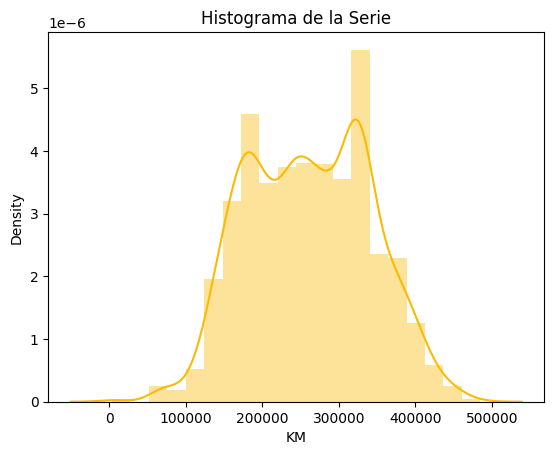

In [39]:
sns.distplot(data_fecha.KM,bins=20,color='#fcba03')
plt.title('Histograma de la Serie')

In [40]:
import scipy.stats
import pylab

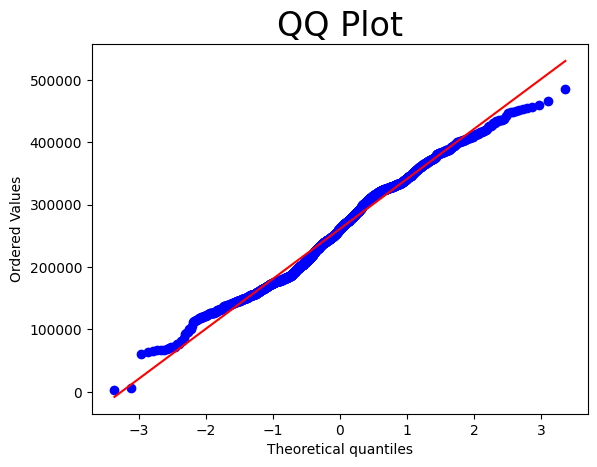

In [41]:
scipy.stats.probplot(data_fecha.KM, plot = pylab)
plt.title("QQ Plot", size = 24)
pylab.show()

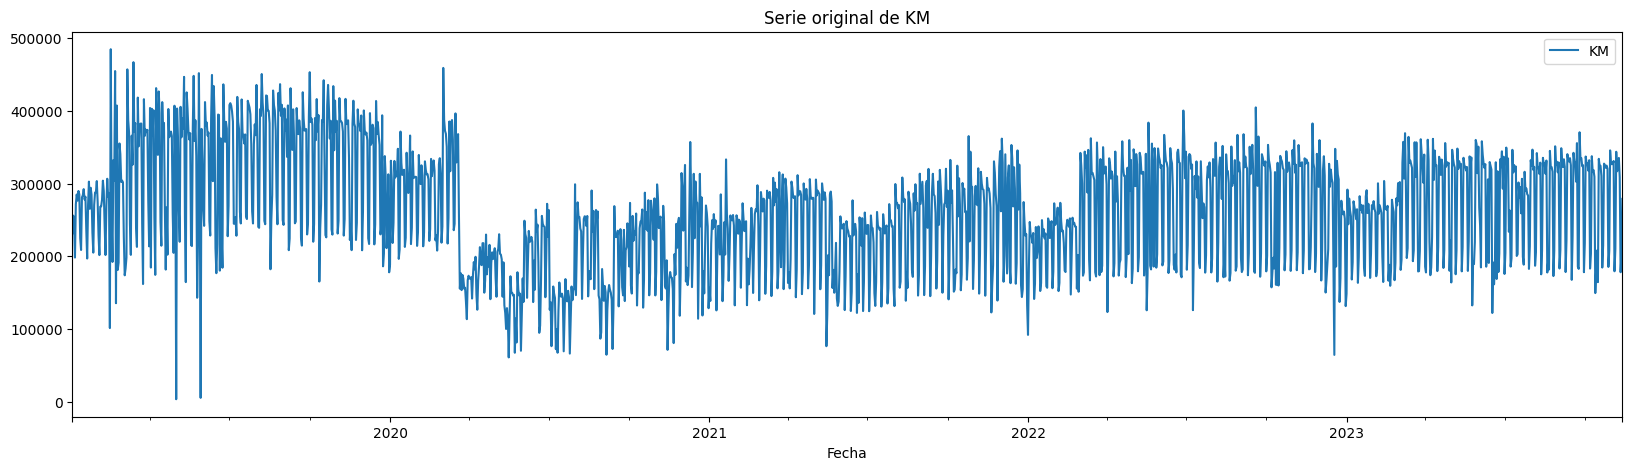

In [50]:
data_fecha.plot(figsize=(20,5), title = "Serie original de KM")
plt.show()

In [53]:
data_diff=data_fecha.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)
data_diff.drop(['2019-01-02'], inplace=True) # se elimina la última fecha al aplicar la primera diferencia

In [54]:
data_diff.head()

,KM
Fecha,
2019-01-03,24411.150
2019-01-04,-9882.202
2019-01-05,-47752.316
2019-01-06,73269.617
2019-01-07,13366.306


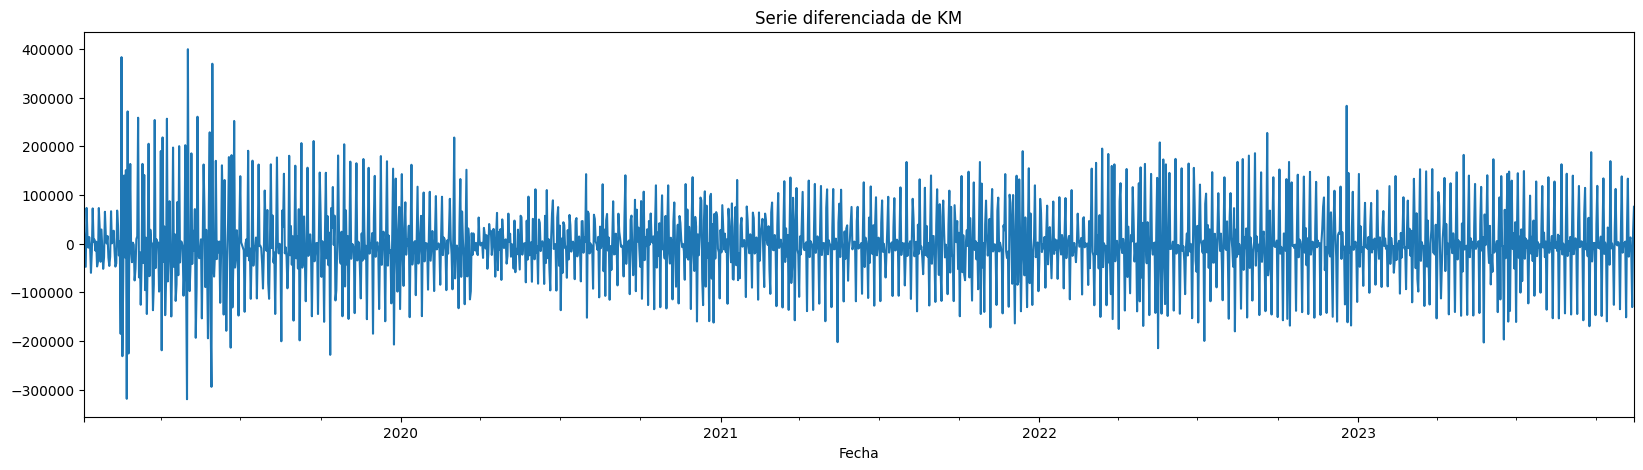

In [56]:
data_diff.KM.plot(figsize=(20,5), title = "Serie diferenciada de KM")
plt.show()

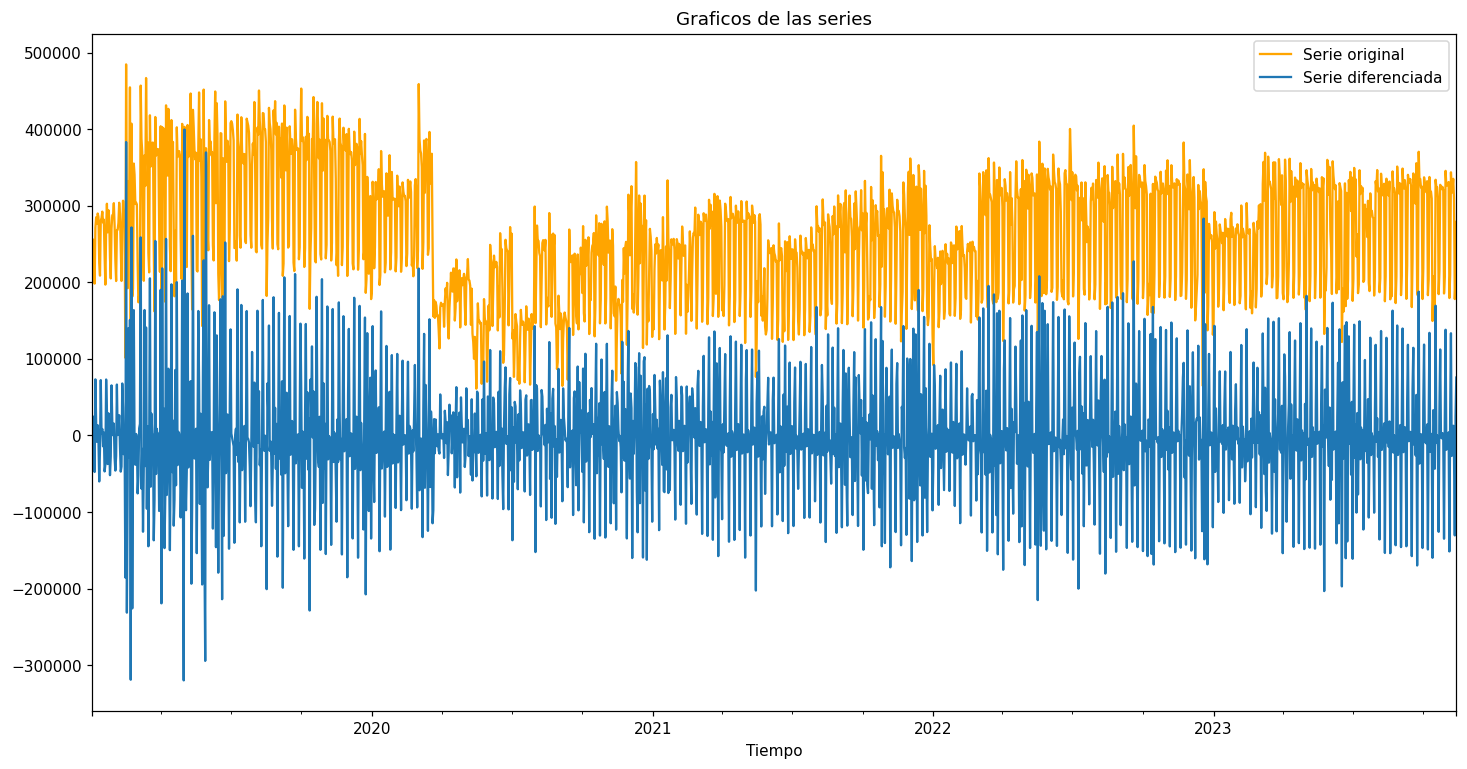

In [57]:
plt.figure(figsize=(16, 8), dpi=110)

data_fecha['KM'].plot(label='Serie original', color='orange')
data_diff['KM'].plot(label='Serie diferenciada')

plt.title('Graficos de las series')

plt.xlabel('Tiempo')

plt.legend()

# Graficos serie original

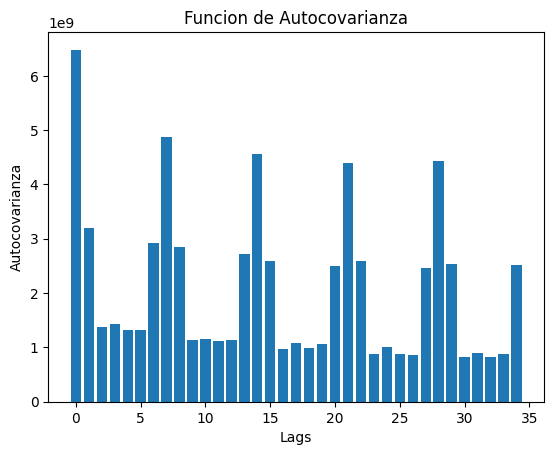

In [61]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = data_fecha.KM

# Calcular autocovarianza para 35 retrasos (lags)
lags = range(35)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

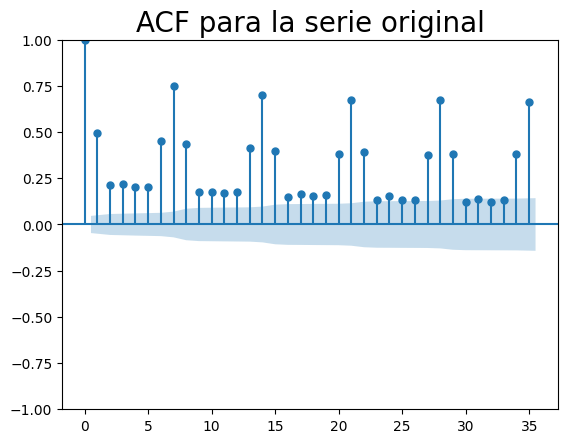

In [62]:
sgt.plot_acf(data_fecha.KM, zero = True, lags = 35)
plt.title("ACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 1*

Una vez mas, vemos la grafica de la funcion de autocorrelacion que muestra cómo las observaciones en una serie de datos se relacionan entre sí a medida que se desplazan en el tiempo. Ayuda a identificar patrones de repetición en los datos.La relacion en cada momento es directa e indirecta con respecto al momento 0.
Con esta grafica, podemos llegar a tener una primera aproximacion de presencia o no de estacionariedad.

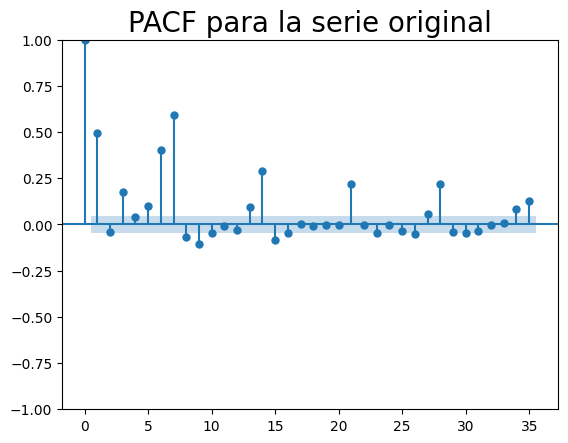

In [63]:
sgt.plot_pacf(data_fecha.KM, lags = 35, alpha = 0.05,  method = ('ols'))
plt.title("PACF para la serie original", size = 20)
plt.show()

*COMENTARIO NUEVO 2*

En este caso, la grafica es de una funcion de autocorrelacion parcial ( PACF = "Partial Autocorrelation Function ). La misma ayuda a identificar relaciones directas entre observaciones separadas en el tiempo, eliminando efectos indirectos. Cuando estamos trabajando con modelos autoregresivos, nos puede mostrar el orden del mismo.

# Graficos serie original diferenciada

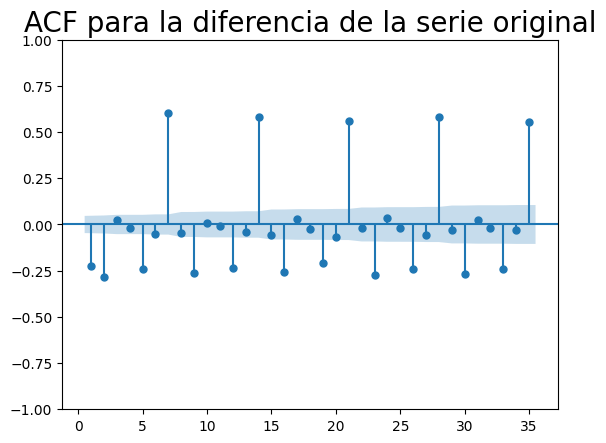

In [64]:
sgt.plot_acf(data_diff.KM, zero = False, lags = 35)
plt.title("ACF para la diferencia de la serie original", size = 20)
plt.show()

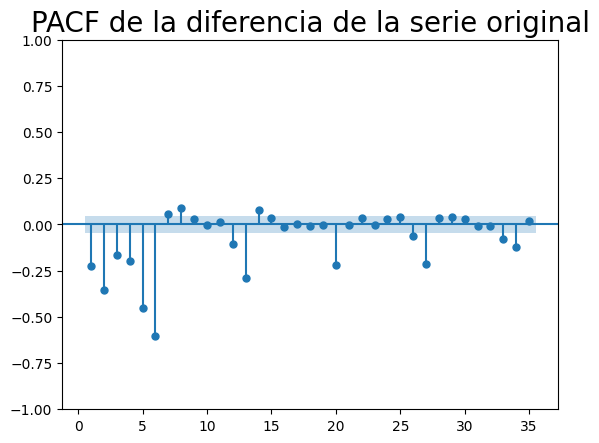

In [65]:
sgt.plot_pacf(data_diff.KM, lags = 35, alpha = 0.05, zero = False)
plt.title("PACF de la diferencia de la serie original", size = 20)
plt.show()

# Modelo Autorregresivo de orden 1

In [66]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [67]:
model = sm.tsa.arima.ARIMA(data_fecha.KM, order=((1),0,0))
result = model.fit()

In [68]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     KM   No. Observations:                 1777
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -22347.116
Date:                Fri, 17 Nov 2023   AIC                          44700.233
Time:                        02:45:08   BIC                          44716.681
Sample:                    01-02-2019   HQIC                         44706.308
                         - 11-13-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.611e+05   3293.513     79.280      0.000    2.55e+05    2.68e+05
ar.L1          0.4931      0.020     24.694      0.000       0.454       0.532
sigma2      4.907e+09      0.002   2.03e+12      0.000    4.91e+09    4.91e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                35.55
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.70   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.38e+30. Standard errors may be unstable.
"""

In [69]:
result.arroots

array([2.02817365])

In [71]:
print(f"Las raíces del modelo condicionado AR(1) son = {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

Las raíces del modelo condicionado AR(1) son = [2.02817365] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [72]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

Los parametros que arroja el modelo son= 
 const     2.611099e+05
ar.L1     4.930544e-01
sigma2    4.907167e+09
dtype: float64 


In [73]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 44700.23273961969 
 -Bayesiano= 44716.68078510416 
 -Hannan-Quinn 44706.30828718512


Presentacion de los residuos del modelo

In [74]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

 La media de los residuos del modelo es=  4.946773380731098


In [75]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

 La varianza de los residuos del modelo es=  4907660022.81981


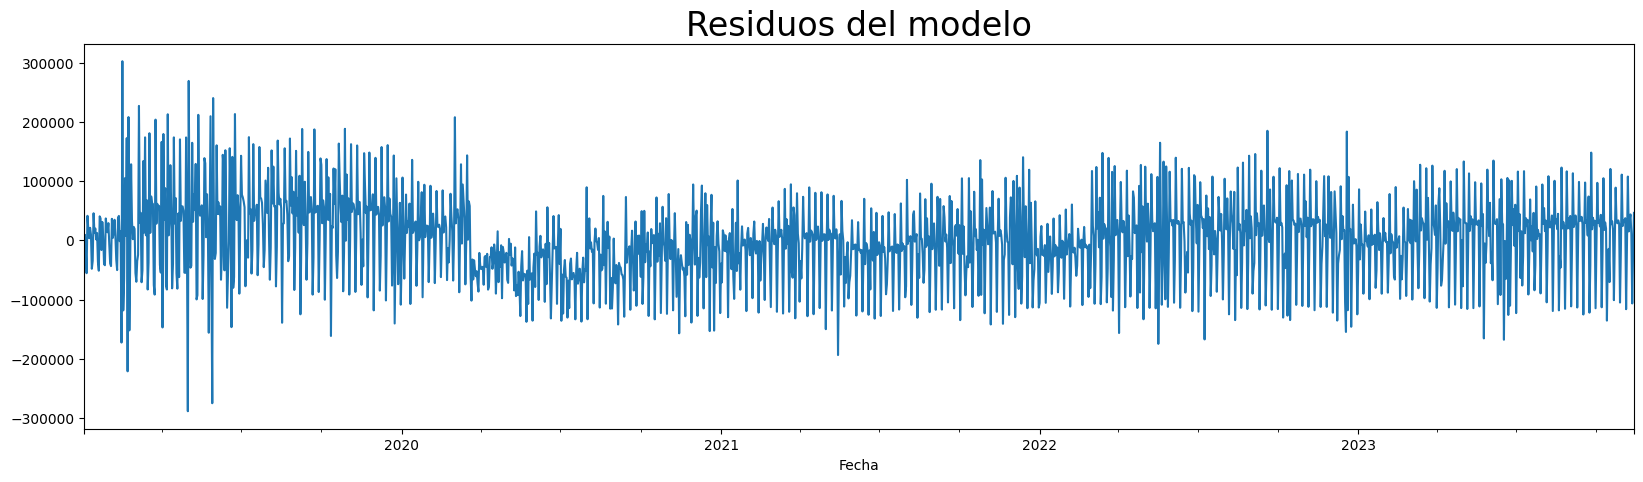

In [76]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

*COMENTARIO NUEVO 3*

En el gráfico, se presentan los residuos del modelo. Para validar la elección adecuada del modelo, es fundamental que los resultados de estos residuos cumplan con la propiedad de "ruido blanco". Es recomendable enfatizar este concepto y aclarar cualquier pregunta o inquietud que puedan surgir al respecto. Estoy a disposición para responder cualquier consulta sin ningún problema.

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

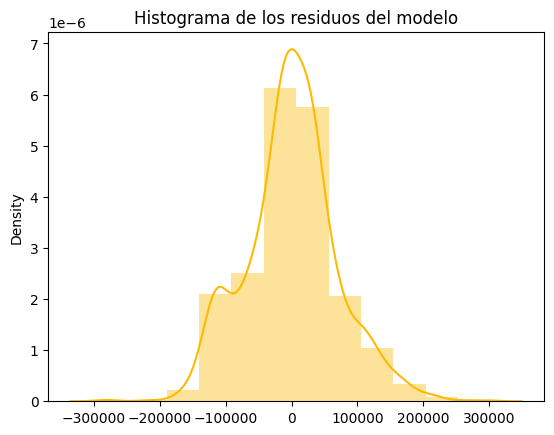

In [77]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [78]:
import scipy.stats
import pylab

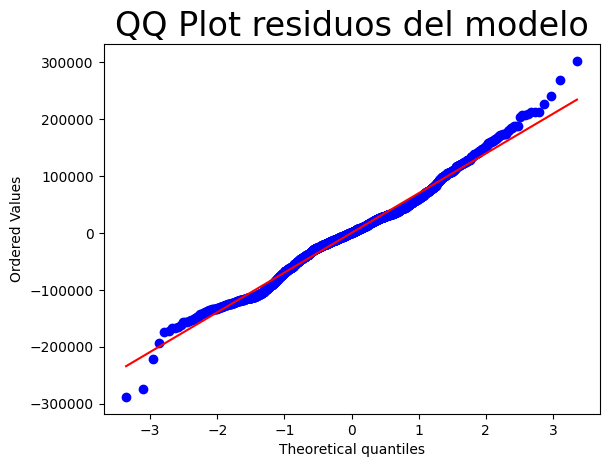

In [79]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

*Prueba* Ljung-Box

In [80]:
import statsmodels.api as sm

In [81]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [82]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.764318,3.819806e-01
2,25.152941,3.452297e-06
3,40.035546,1.047183e-08
4,45.824191,2.679298e-09
5,60.751799,8.498381e-12
6,86.028306,2.021015e-16
7,844.717769,4.140636e-178
8,869.104976,2.601533e-182
9,891.921718,3.403833e-186
10,899.561169,7.914737e-187


Text(0, 0.5, 'P-valores ')

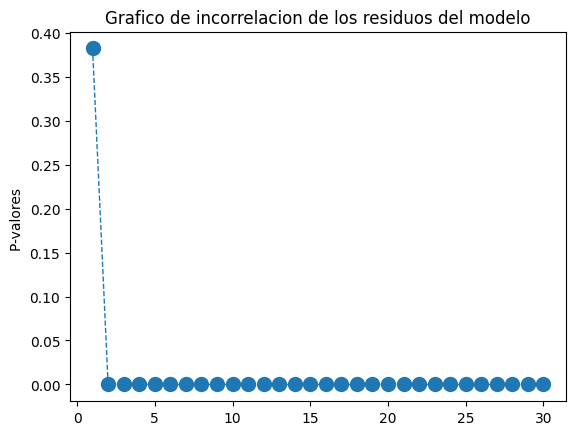

In [83]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

*COMENTARIO NUEVO 4*

Aqui vemos la grafica de incorrelacion de los residuos del modelo, los residuos tienen q estar incorrelacionados. Tienen q ser proxi al ruido blanco. Una forma de analisis es esta grafica para ver esto. En este caso, los residuos no presentan correlacion.